In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from typing import List, Tuple
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import ConfusionMatrixDisplay
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn import svm
card_df = pd.read_csv('Credit_card.csv')
label_df = pd.read_csv('Credit_card_label.csv')

This is the cleaning from Week 6, I simply merged the two datasets together to make it easier for machine learning

In [108]:
credit_df = pd.merge(card_df,label_df)


This is the new preprocessing 

In [109]:
credit_df = pd.get_dummies(credit_df)
#This changes categorical to numerical- from 0-1. This makes it easier for the machine to read


In [110]:
credit_df.fillna(credit_df.mean(), inplace=True)
#This removed all the NaN that may be present in the data, allowing for the machine to read it better

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ncredit_df = scaler.fit_transform(credit_df)
#This normalized the data so that there are less instances of error


In [112]:
credit_df

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,5008827,0,180000.00000,-18772.000000,365243,1,0,0,0,2,...,False,False,False,False,False,False,False,False,False,False
1,5009744,0,315000.00000,-13557.000000,-586,1,1,1,0,2,...,False,False,False,False,False,False,False,False,False,False
2,5009746,0,315000.00000,-16040.342071,-586,1,1,1,0,2,...,False,False,False,False,False,False,False,False,False,False
3,5009749,0,191399.32623,-13557.000000,-586,1,1,1,0,2,...,False,False,False,False,False,False,False,False,False,False
4,5009752,0,315000.00000,-13557.000000,-586,1,1,1,0,2,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,191399.32623,-11957.000000,-2182,1,0,0,0,2,...,False,False,True,False,False,False,False,False,False,False
1544,5023655,0,225000.00000,-10229.000000,-1209,1,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
1545,5115992,2,180000.00000,-13174.000000,-2477,1,0,0,0,4,...,False,False,True,False,False,False,False,False,False,False
1546,5118219,0,270000.00000,-15292.000000,-645,1,1,1,0,2,...,False,False,False,False,False,False,False,False,False,False


(8 pts) Perform combined, oversampling, or undersampling on the dataset you selected for Assignment 6.  Explain why you chose what you did. How did this impact the results of your KNN and Logistic Regression? 

In [113]:
X = credit_df.drop('label', axis =1)
y =credit_df['label']


X_train, X_test, y_train, y_test =  train_test_split(X, y,
                                                     test_size=0.3,
                                                     random_state =32,
                                                     stratify = y)


In [114]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=32)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

model = LogisticRegression(random_state=32)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

/Users/aarushichoudhary/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


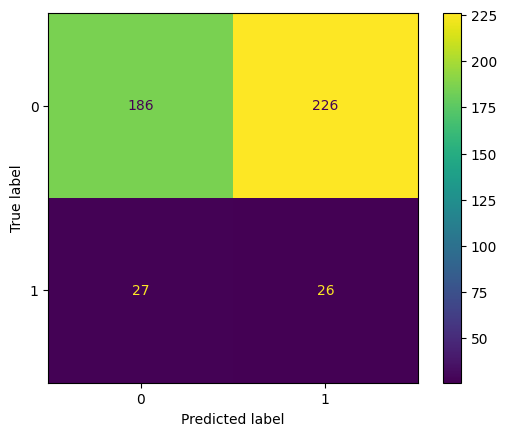

In [115]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [128]:
sc = StandardScaler()
def find_optimal_k(X_train, y_train, X_test, y_test, max_k=20):
    accuracy_values = []
    
    for k in range(1, 20):
        knn_model = KNeighborsClassifier(n_neighbors=k)
        X_train = sc.fit_transform(X_train)
        X_test = sc.fit_transform(X_test)   
        knn_model.fit(X_train, y_train)
        y_pred = knn_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_values.append(accuracy)
    optimal_k = accuracy_values.index(max(accuracy_values))
    print(f"Optimal value of k: {optimal_k}")
    return optimal_k
optimal_k = find_optimal_k(X_train, y_train, X_test, y_test)

Optimal value of k: 15


In [129]:
regression_model = LogisticRegression()
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
r2_score(y_test, y_pred)

-0.12864077669902918

I oversampled my data because I felt that the data wasn't making detailed predictions. It increased my KNN and decreased my logistic regression. 

 Create an ROC Curve for the model and calculate the AUC

In [116]:
X = credit_df.drop('label', axis =1)
y =credit_df['label']


X_train, X_test, y_train, y_test =  train_test_split(X, y,
                                                     test_size=0.3,
                                                     random_state =32,
                                                     stratify = y)



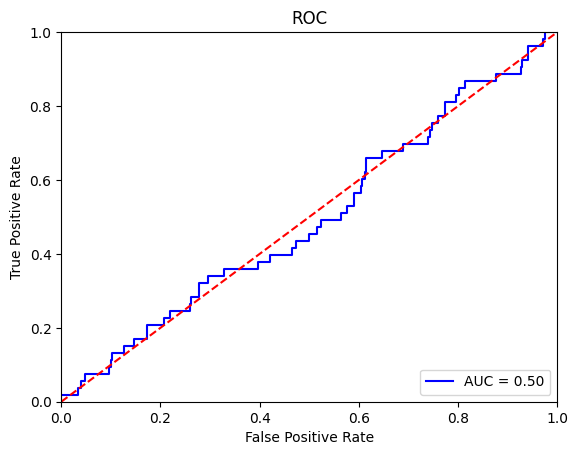

In [117]:
def roc_curve(probs, preds):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    return roc_curve


plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [118]:
def calculate_auc(X_train, X_test, y_train, y_test):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = LogisticRegression() 
    clf.fit(X_train, y_train)
    y_proba = clf.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, y_proba)
    return auc_roc
print(auc_roc)

0.5658333333333334


Perform linear SVM

In [127]:
def train_linear_svm(X, y):
    svm_classifier = SVC(kernel='linear')
    svm_classifier.fit(X, y)
    return svm_classifier

def evaluate_linear_svm(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

svm_model = train_linear_svm(X_train, y_train)

svm = evaluate_linear_svm(svm_model, X_test, y_test)
print(svm)

0.886021505376344


It performed pretty well since the number was pretty high

What is outlier detection? Why is it important? What methods can you use for outlier detection?

Outlier detection is the process of identifying points of data that deviate from the rest of the dataset. It helps detect errors or observations that are unexpected. It is important because it helps us understand how well a dataset performs, and whether we can use it. Some methods for outlier detection are machine learning algorithims like Logistic Regression and KNN.